# League of Legends Champion Data - Column Breakdown

## Basic Information
- **id** – The numerical ID of the champion.
- **apiname** – The internal API name of the champion.
- **title** – The champion’s in-game title (e.g., *"the Darkin Blade"* for Aatrox).
- **difficulty** – A numerical representation of how difficult the champion is to play (higher means harder).
- **herotype** – The primary role/class of the champion (e.g., Fighter, Mage, Assassin).
- **alttype** – An alternative role/class (if applicable).
- **resource** – The resource used by the champion (e.g., Mana, Energy, Blood Well).
- **rangetype** – Indicates whether the champion is **Melee** or **Ranged**.
- **fullname** – The full name of the champion (if available).
- **nickname** – Any known nicknames for the champion.

## Stats & Attributes
- **stats** – A dictionary containing base stats such as health, mana, attack damage, etc.
- **damage** – A numerical rating of the champion’s damage potential.
- **toughness** – A numerical rating of the champion’s tankiness.
- **control** – How much crowd control (CC) the champion has.
- **mobility** – A rating of how mobile the champion is.
- **utility** – A rating of the champion’s non-damage utility (heals, shields, etc.).
- **style** – A score indicating how stylish or complex the champion's kit is.
- **adaptivetype** – The type of adaptive damage they use (**AP** or **AD**).

## Game Information
- **date** – Likely the release date of the champion.
- **patch** – The patch version when the champion was last updated.
- **changes** – Details about any changes made to the champion.
- **role** – The primary role the champion plays in the game.
- **client_positions** – Champion placement in the game client (not always applicable).
- **external_positions** – Similar to client positions but used externally.

## Cost
- **be** – The **Blue Essence** cost of unlocking the champion.
- **rp** – The **Riot Points** cost of unlocking the champion.

## Abilities
- **skill_i** – The champion's passive ability.
- **skill_q** – The champion's **Q** ability.
- **skill_w** – The champion's **W** ability.
- **skill_e** – The champion's **E** ability.
- **skill_r** – The champion's **Ultimate (R)** ability.
- **skills** – A dictionary containing all the champion’s abilities.

## Miscellaneous
- **Unnamed: 0** – Likely an index column that can be ignored.


In [126]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [127]:
# Read the CSV file into a DataFrame
df = pd.read_csv('110225_LoL_champion_data.csv')
df.shape

(172, 33)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          172 non-null    object 
 1   id                  172 non-null    float64
 2   apiname             172 non-null    object 
 3   title               172 non-null    object 
 4   difficulty          172 non-null    int64  
 5   herotype            172 non-null    object 
 6   alttype             144 non-null    object 
 7   resource            167 non-null    object 
 8   stats               172 non-null    object 
 9   rangetype           172 non-null    object 
 10  date                172 non-null    object 
 11  patch               172 non-null    object 
 12  changes             172 non-null    object 
 13  role                172 non-null    object 
 14  client_positions    172 non-null    object 
 15  external_positions  172 non-null    object 
 16  damage  

In [129]:
# Drop columns that are not needed
df.drop(['fullname','nickname','Unnamed: 0','title','rp','be','apiname','changes','date','patch','stats'], axis=1, inplace=True)
columns_to_drop = df.filter(regex=r'^skill').columns
df.drop(columns=columns_to_drop, axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(140, 16)

In [130]:
# Check for columns values
coloumns=df.columns
for col in coloumns:
    print(df[col].value_counts())
    print('-'*50)

id
266.0    1
103.0    1
166.0    1
12.0     1
799.0    1
        ..
350.0    1
154.0    1
26.0     1
142.0    1
143.0    1
Name: count, Length: 140, dtype: int64
--------------------------------------------------
difficulty
2    72
1    49
3    19
Name: count, dtype: int64
--------------------------------------------------
herotype
Fighter     44
Mage        28
Tank        23
Marksman    18
Support     16
Assassin    11
Name: count, dtype: int64
--------------------------------------------------
alttype
Mage        37
Assassin    29
Support     28
Tank        24
Fighter     17
Marksman     5
Name: count, dtype: int64
--------------------------------------------------
resource
Mana            118
Energy            3
Rage              3
Fury              3
Courage           2
Health            2
Flow              2
Blood Well        1
Frenzy            1
Shield            1
Ferocity          1
Heat              1
Grit              1
Crimson Rush      1
Name: count, dtype: int64
--------

In [131]:
df.describe(),'*'*100,df.describe(include='object')

(               id  difficulty      damage   toughness     control    mobility  \
 count  140.000000  140.000000  140.000000  140.000000  140.000000  140.000000   
 mean   199.495000    1.785714    2.378571    1.692857    2.042857    1.757143   
 std    257.519984    0.665552    0.714373    0.776419    0.718426    0.776187   
 min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
 25%     38.750000    1.000000    2.000000    1.000000    2.000000    1.000000   
 50%     97.500000    2.000000    3.000000    1.500000    2.000000    2.000000   
 75%    235.250000    2.000000    3.000000    2.000000    3.000000    2.000000   
 max    950.000000    3.000000    3.000000    3.000000    3.000000    3.000000   
 
           utility       style  
 count  140.000000  140.000000  
 mean     1.485714   60.400000  
 std      0.673076   31.289275  
 min      1.000000    0.000000  
 25%      1.000000   30.000000  
 50%      1.000000   65.000000  
 75%      2.000000   90.00000

In [132]:
#create a new column for combined type and drop the old columns
df["combined_type"] = df["herotype"] + "_" + df["alttype"]
df['atack_range_type'] = df['rangetype']+'_'+df['adaptivetype']
df.drop(['herotype','alttype','rangetype','adaptivetype'], axis=1, inplace=True)


In [133]:
# Encoding the categorical columns
le = LabelEncoder()
df['comb_type'] = le.fit_transform(df['combined_type'])

In [134]:

# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['resource','client_positions','external_positions','role','atack_range_type'])
print(df.describe(include='all'))


                id  difficulty      damage   toughness     control  \
count   140.000000  140.000000  140.000000  140.000000  140.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    199.495000    1.785714    2.378571    1.692857    2.042857   
std     257.519984    0.665552    0.714373    0.776419    0.718426   
min       1.000000    1.000000    1.000000    1.000000    1.000000   
25%      38.750000    1.000000    2.000000    1.000000    2.000000   
50%      97.500000    2.000000    3.000000    1.500000    2.000000   
75%     235.250000    2.000000    3.000000    2.000000    3.000000   
max     950.000000    3.000000    3.000000    3.000000    3.000000   

          mobility     utility       style combined_type   comb_type  ...  \
count   140.000000  140.000000  140.000000           140  140.000000  ...   
uniqu

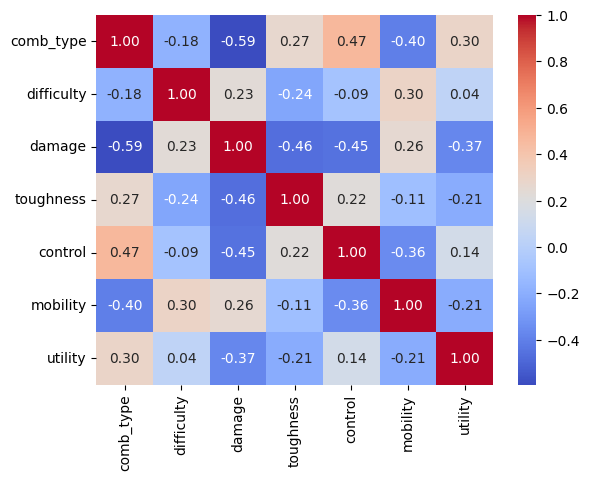

In [135]:
#heatmap
sns.heatmap(df[['comb_type','difficulty','damage','toughness','control','mobility','utility']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

C:\Users\20101\AppData\Local\Temp\ipykernel_24844\1725202166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="comb_type", y="difficulty", palette="Set2")


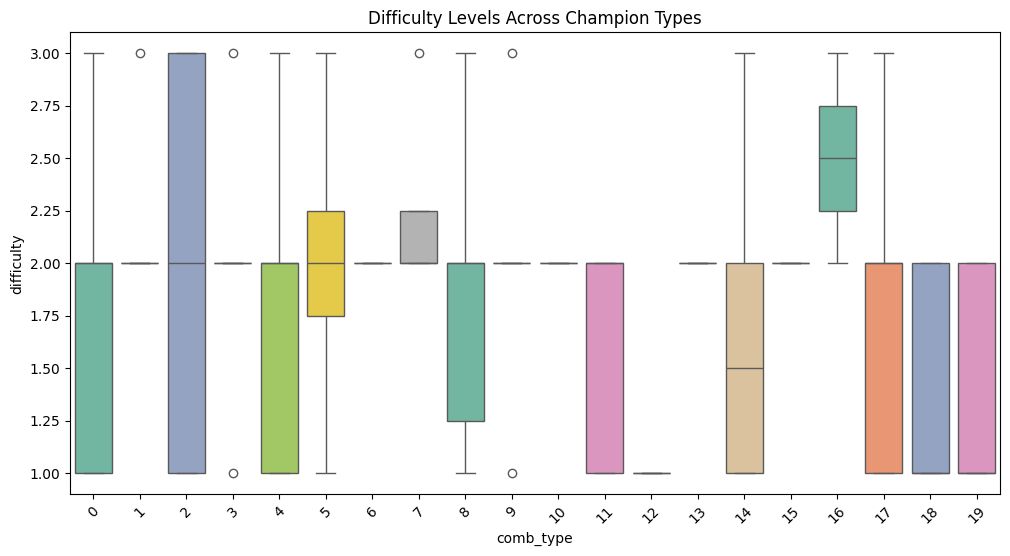

In [136]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="comb_type", y="difficulty", palette="Set2")
plt.xticks(rotation=45)
plt.title("Difficulty Levels Across Champion Types")
plt.show()

In [137]:
X = df.drop(['comb_type','combined_type'], axis=1) # Define features (X)
y = df['comb_type'] # Define the target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets
param_grid = {'n_estimators': [50, 100, 200]}
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)
model = grid.best_estimator_ # Initialize the Random Forest classifier with 100 trees
model.fit(X_train, y_train) # Train the model on the training data

d:\vscode\.venv\lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


RandomForestClassifier(class_weight='balanced')

In [138]:
predictions = model.predict(X_test) # Make predictions on the test data
accuracy_score(y_test, predictions) # Calculate and print the accuracy of the model

0.6785714285714286

In [139]:
def all(models, X_train, y_train, X_test, y_test):
    accuracies = []
    for model in models:  # Looping over models inside the function
        model.fit(X_train, y_train)  # Train the model
        pred = model.predict(X_test)  # Predict on the test data
        accuracy = accuracy_score(y_test, pred)  # Calculate accuracy of model
        print(f"Accuracy of {model.__class__.__name__}: {accuracy}")
        accuracies.append(accuracy)  # Store the accuracy in the list
    return accuracies

In [143]:
# Define a list of models to evaluate
models = [
    RandomForestClassifier(class_weight='balanced'),
    LogisticRegression(max_iter=1000),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC()
]
accuracies = all(models, X_train, y_train, X_test, y_test) # Evaluate the models and get their accuracies
new_data = pd.DataFrame({
    'Model': [model.__class__.__name__ for model in models],
    'Accuracy': accuracies
})
new_data # Print the DataFrame

Accuracy of RandomForestClassifier: 0.5714285714285714


d:\vscode\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of LogisticRegression: 0.6785714285714286
Accuracy of GradientBoostingClassifier: 0.5357142857142857
Accuracy of KNeighborsClassifier: 0.21428571428571427
Accuracy of GaussianNB: 0.39285714285714285
Accuracy of SVC: 0.17857142857142858


,Model,Accuracy
0,RandomForestClassifier,0.571429
1,LogisticRegression,0.678571
2,GradientBoostingClassifier,0.535714
3,KNeighborsClassifier,0.214286
4,GaussianNB,0.392857
5,SVC,0.178571


In [141]:
print(max(new_data['Accuracy']))

0.6785714285714286
